<a href="https://colab.research.google.com/github/fakhia/gene-to-protein-analysis/blob/main/Codon_Usage_Profiling_of_Human_TRPV6_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install biopython

from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def fetch_trpv6_sequences(email="your_email@example.com"):
    Entrez.email = email

    # Use the validated human TRPV6 RefSeq record
    trpv6_id = "NM_018646.6"

    try:
        handle = Entrez.efetch(db="nucleotide", id=trpv6_id, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()

        dna_seq = record.seq
        protein_seq = dna_seq.translate(to_stop=True)

        # Save sequences
        SeqIO.write(SeqRecord(dna_seq, id="TRPV6_HUMAN_CDS",
                              description="Human TRPV6 Coding DNA Sequence"),
                    "trpv6_dna.fasta", "fasta")
        SeqIO.write(SeqRecord(protein_seq, id="TRPV6_HUMAN_PROTEIN",
                              description="Translated TRPV6 Protein Sequence"),
                    "trpv6_protein.fasta", "fasta")

        print("✅ TRPV6 DNA and protein sequences fetched successfully!")
        print(f"DNA length: {len(dna_seq)} bp")
        print(f"Protein length: {len(protein_seq)} aa")
        return dna_seq, protein_seq

    except Exception as e:
        print(f"⚠️ Error fetching TRPV6 sequences: {e}")
        return None, None

# Run the function
dna_seq, protein_seq = fetch_trpv6_sequences("fakihach8@gmail.com")

if dna_seq:
    print("\nDNA (first 300 bp):", dna_seq[:300])
    print("\nProtein (first 100 aa):", protein_seq[:100])


✅ TRPV6 DNA and protein sequences fetched successfully!
DNA length: 2906 bp
Protein length: 51 aa

DNA (first 300 bp): AGAGTCCTGGCTGGCTCTGCCAAGTGTAACAAACTCACAGCCCTCTCCAAACTGGCTGGGGCTGCTGGGAGACTCCCAAGGAACTCGTCAGGAAGGCAGGAGACAGGAGACGGGACCTCTACAGGGAGACGGTGGGCCGGCCCTTGGGGGGGCTGATGTGGCCCCAAGGCTGAGTCCCGTCAGGGTCTGGCCTCGGCCTCAGGCCCCCAAGGAGCCGGCCCTACACCCCATGGGTTTGTCACTGCCCAAGGAGAAAGGGCTAATTCTCTGCCTATGGAGCAAGTTCTGCAGATGGTTCCA

Protein (first 100 aa): RVLAGSAKCNKLTALSKLAGAAGRLPRNSSGRQETGDGTSTGRRWAGPWGG


/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


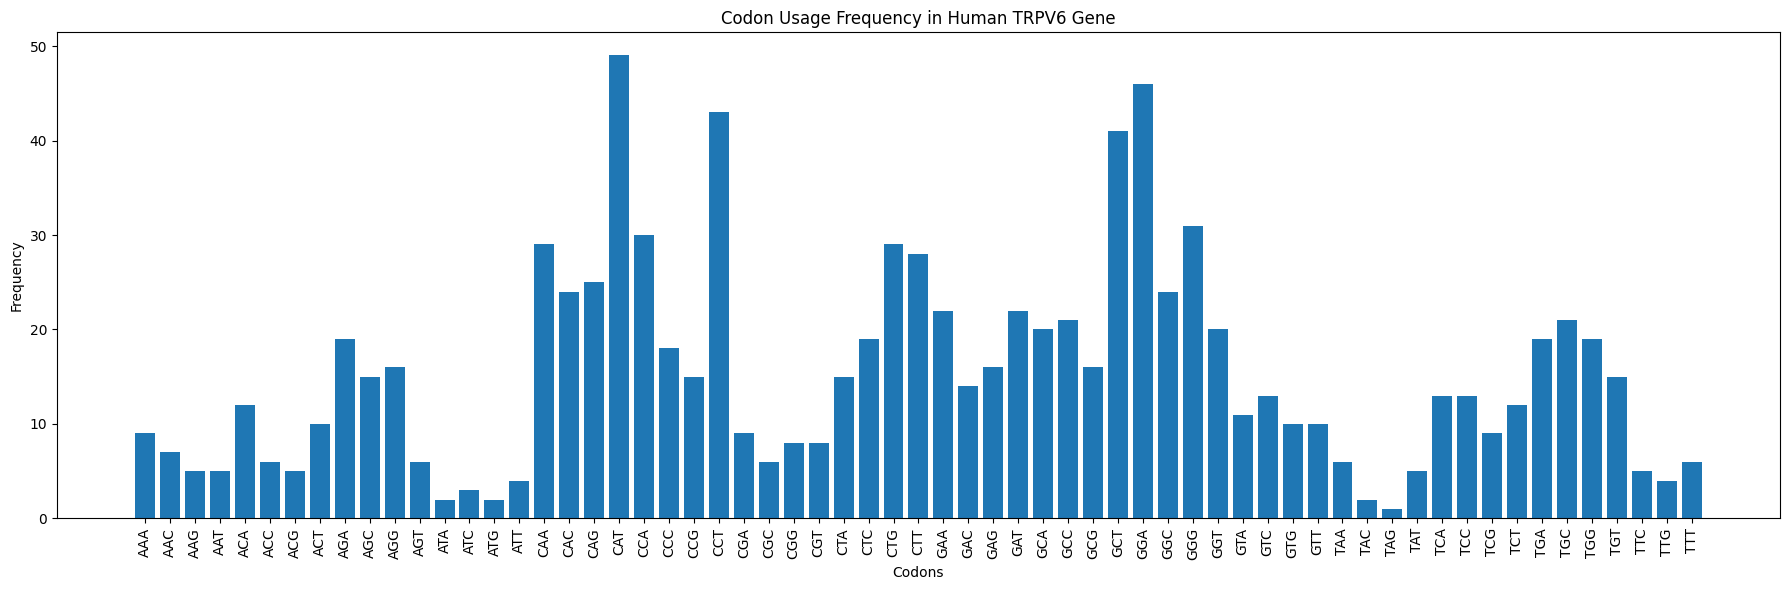

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_codon_usage(dna_seq):
    dna_seq = str(dna_seq).upper()
    codons = [dna_seq[i:i+3] for i in range(0, len(dna_seq) - 2, 3) if len(dna_seq[i:i+3]) == 3]
    codon_counts = Counter(codons)

    codons_sorted = sorted(codon_counts.keys())
    counts_sorted = [codon_counts[codon] for codon in codons_sorted]

    plt.figure(figsize=(18,6))
    plt.bar(codons_sorted, counts_sorted)
    plt.xticks(rotation=90)
    plt.title("Codon Usage Frequency in Human TRPV6 Gene")
    plt.xlabel("Codons")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot codon usage for TRPV6
plot_codon_usage(dna_seq)


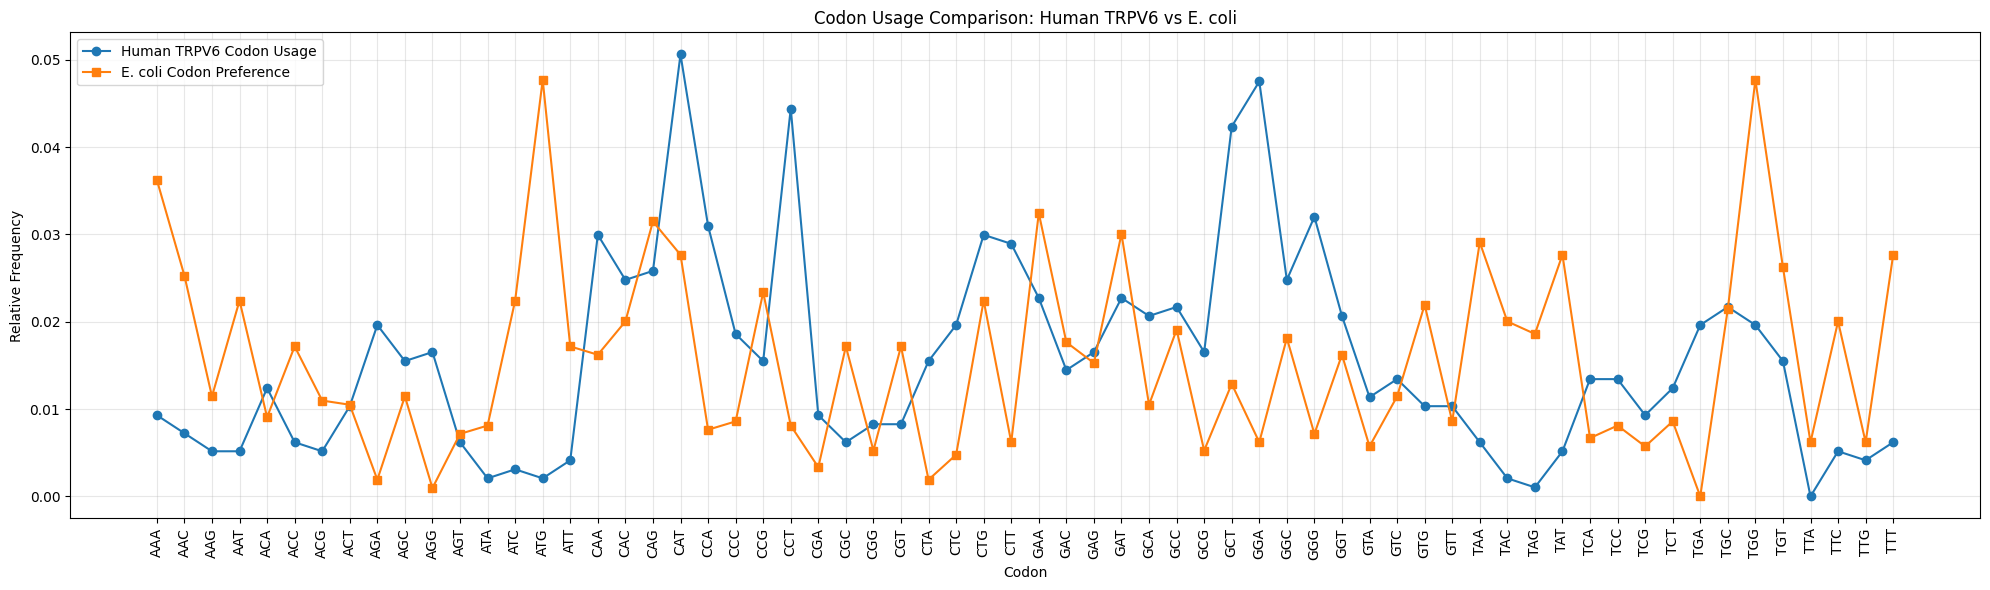

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

def get_codon_usage(dna_seq):
    dna_seq = dna_seq.upper().replace("\n", "").replace(" ", "")
    codons = [dna_seq[i:i+3] for i in range(0, len(dna_seq)-2, 3) if len(dna_seq[i:i+3]) == 3]
    return Counter(codons)

# Simplified E. coli codon usage table (relative frequencies)
ecoli_codon_usage = {
    'TTT': 0.58, 'TTC': 0.42, 'TTA': 0.13, 'TTG': 0.13,
    'CTT': 0.13, 'CTC': 0.10, 'CTA': 0.04, 'CTG': 0.47,
    'ATT': 0.36, 'ATC': 0.47, 'ATA': 0.17, 'ATG': 1.00,
    'GTT': 0.18, 'GTC': 0.24, 'GTA': 0.12, 'GTG': 0.46,
    'TCT': 0.18, 'TCC': 0.17, 'TCA': 0.14, 'TCG': 0.12,
    'CCT': 0.17, 'CCC': 0.18, 'CCA': 0.16, 'CCG': 0.49,
    'ACT': 0.22, 'ACC': 0.36, 'ACA': 0.19, 'ACG': 0.23,
    'GCT': 0.27, 'GCC': 0.40, 'GCA': 0.22, 'GCG': 0.11,
    'TAT': 0.58, 'TAC': 0.42, 'TAA': 0.61, 'TAG': 0.39,
    'CAT': 0.58, 'CAC': 0.42, 'CAA': 0.34, 'CAG': 0.66,
    'AAT': 0.47, 'AAC': 0.53, 'AAA': 0.76, 'AAG': 0.24,
    'GAT': 0.63, 'GAC': 0.37, 'GAA': 0.68, 'GAG': 0.32,
    'TGT': 0.55, 'TGC': 0.45, 'TGG': 1.00,
    'CGT': 0.36, 'CGC': 0.36, 'CGA': 0.07, 'CGG': 0.11,
    'AGT': 0.15, 'AGC': 0.24, 'AGA': 0.04, 'AGG': 0.02,
    'GGT': 0.34, 'GGC': 0.38, 'GGA': 0.13, 'GGG': 0.15
}

def plot_codon_comparison(dna_seq):
    trpv6_usage = get_codon_usage(dna_seq)
    total_codons = sum(trpv6_usage.values())

    codons = sorted(set(list(trpv6_usage.keys()) + list(ecoli_codon_usage.keys())))

    # Ensure numerical, aligned lists
    human_freq = [float(trpv6_usage.get(c, 0)) / total_codons for c in codons]
    ecoli_freq = [float(ecoli_codon_usage.get(c, 0)) / sum(ecoli_codon_usage.values()) for c in codons]

    # Just in case, make sure both lists have equal length
    assert len(human_freq) == len(ecoli_freq), "Length mismatch between lists!"

    plt.figure(figsize=(20,6))
    plt.plot(range(len(codons)), human_freq, label="Human TRPV6 Codon Usage", marker='o')
    plt.plot(range(len(codons)), ecoli_freq, label="E. coli Codon Preference", marker='s')
    plt.xticks(range(len(codons)), codons, rotation=90)
    plt.title("Codon Usage Comparison: Human TRPV6 vs E. coli")
    plt.xlabel("Codon")
    plt.ylabel("Relative Frequency")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Run it ---
plot_codon_comparison(dna_seq)
